In [39]:
PROJECT_PATH = "/Users/lukefoster/Documents/CompEtho/BM_GPU"
CONFIG_PATH = f"{PROJECT_PATH}/config_prac.yaml"

In [40]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm.notebook import tqdm
import random

from sklearn.utils import shuffle
from cluster import HDBSCAN

sys.path.append(PROJECT_PATH)
from utils.data import Dataset
import utils.figure as ufigure

from utils.figure import plot_HDBSCAN

In [41]:
Data = Dataset(PROJECT_PATH, CONFIG_PATH)
Data.load_data()

  0%|          | 0/141 [00:00<?, ?it/s]

Loading config.yaml ...
Finished loading config
Loading INFO.yaml ...
Finished loading INFO


100%|██████████| 141/141 [00:13<00:00, 10.31it/s]


In [42]:
INFO = Data.info
INFO_values = Data.info_values
config = Data.config

skeleton = config['skeleton']
skeleton_color = config['skeleton_color']

bp = Data.data_obj['bodypoints']
rot_bp = Data.data_obj['rotated_bodypoints']
angles = Data.data_obj['angles']
limbs = Data.data_obj['limbs']
angle_power = Data.data_obj['angle_power']
limb_power = Data.data_obj['limb_power']

all_embed = Data.data_obj['all_embeddings']
all_postural_embed = Data.data_obj['all_postural_embeddings']
all_kinematic_embed = Data.data_obj['all_kinematic_embeddings']

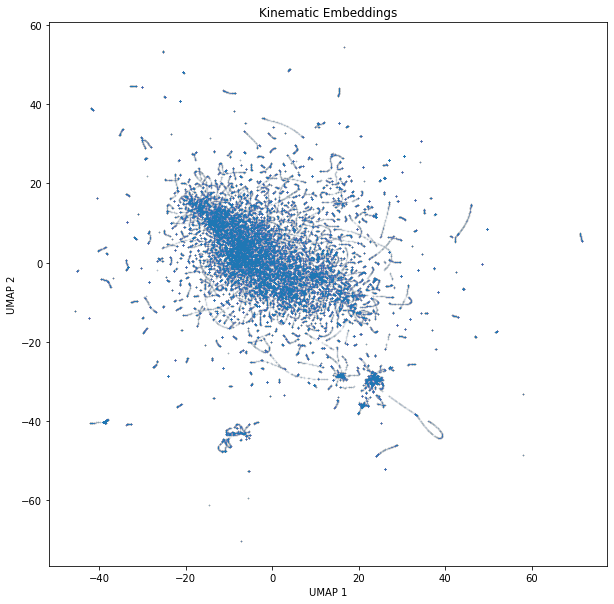

In [43]:
fig_prac, ax = plt.subplots(figsize=(10,10))
ax.scatter(all_kinematic_embed[:,0], all_kinematic_embed[:,1], alpha=0.01, s=0.25)
ax.set(title="Kinematic Embeddings", xlabel="UMAP 1", ylabel="UMAP 2")
plt.show()

In [44]:
labels, num_clusters, clusterer = HDBSCAN(all_kinematic_embed, min_cluster_size=5000,
                                          min_samples=20, cluster_selection_epsilon=0,
                                          cluster_selection_method='leaf', memory='memory')
color_palette = sns.color_palette('rainbow', int(num_clusters))
color_palette = shuffle(color_palette, random_state=1)

Frac Outlier: 0.19602134030717822
# Clusters: 20


100%|██████████| 20/20 [00:00<00:00, 4373.62it/s]


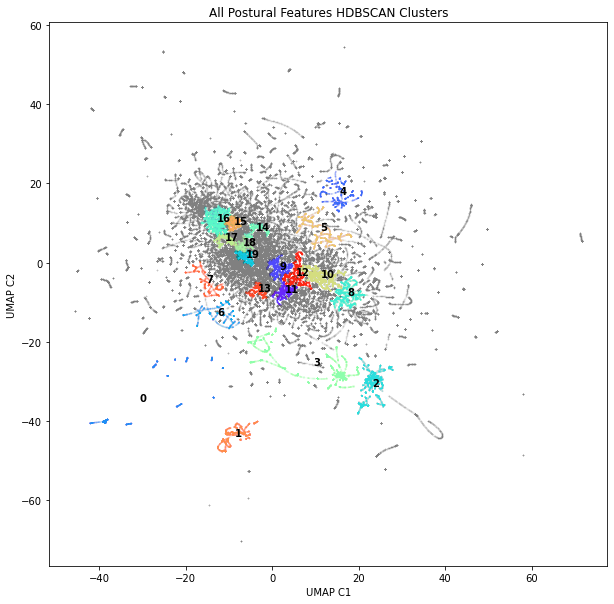

In [46]:
fig, ax = plt.subplots(figsize=(10,10))
plot_HDBSCAN(ax, all_kinematic_embed, labels, color_palette, alpha=0.01,
             toggle_numbering=True)

plt.show()